# Covid-19-Trend-Predictor

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [14]:
# data
df = pd.read_csv('../Timeseries-Data/timeseries_data.csv')
df.head()
# Preparing the data
columns_to_keep = ['Index','Location','Population_Density','Date','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df = df[columns_to_keep]
df

,Index,Location,Population_Density,Date,Min_Temp,Max_Temp,Lockdown,Num_Cases
0,0.0,USA,94.0,1/22/2020,-4.0,6.0,0,1
1,1.0,USA,94.0,1/23/2020,-1.0,8.0,0,1
2,2.0,USA,94.0,1/24/2020,2.0,13.0,0,2
3,3.0,USA,94.0,1/25/2020,4.0,11.0,0,2
4,4.0,USA,94.0,1/26/2020,2.0,11.0,0,5
5,5.0,USA,94.0,1/27/2020,5.0,11.0,0,5
6,6.0,USA,94.0,1/28/2020,2.0,11.0,0,5
7,7.0,USA,94.0,1/29/2020,2.0,10.0,0,5
8,8.0,USA,94.0,1/30/2020,4.0,10.0,0,5
9,9.0,USA,94.0,1/31/2020,2.0,6.0,0,7


In [15]:
numeric_columns = ['Population_Density','Lockdown','Max_Temp','Min_Temp']
df_numeric = df[numeric_columns]
df_temp = df[['Min_Temp','Max_Temp']]
final_temp = []

df_numeric.head()
print('Min', np.min(df_numeric))
print('Max', np.max(df_numeric))
dataset = df_numeric.astype('float64')
# scaling
scaler = MinMaxScaler(feature_range=(0.0, 1.0))
scaled_data = scaler.fit_transform(dataset)
temp_deno = (np.max(df['Max_Temp']) - np.min(df['Min_Temp']))
temp_num = np.min(df['Min_Temp'])
print(scaled_data)
for ind in df['Index']:
    index = int(ind)
    df.at[index,'Population_Density'] = scaled_data[index][0]
    df.at[index,'Lockdown'] = scaled_data[index][1]
    df.at[index,'Min_Temp'] = (df.at[index,'Min_Temp'] - temp_num)/ temp_deno
    df.at[index,'Max_Temp'] = (df.at[index,'Max_Temp'] - temp_num)/ temp_deno
df

Min Population_Density    9.0
Lockdown              0.0
Max_Temp              5.0
Min_Temp             -8.0
dtype: float64
Max Population_Density    1202.0
Lockdown               100.0
Max_Temp                40.0
Min_Temp                26.0
dtype: float64
[[0.07124895 0.         0.02857143 0.11764706]
 [0.07124895 0.         0.08571429 0.20588235]
 [0.07124895 0.         0.22857143 0.29411765]
 ...
 [0.         1.         0.51428571 0.52941176]
 [0.         1.         0.48571429 0.64705882]
 [0.         1.         0.48571429 0.58823529]]


,Index,Location,Population_Density,Date,Min_Temp,Max_Temp,Lockdown,Num_Cases
0,0.0,USA,0.071249,1/22/2020,0.083333,0.291667,0,1
1,1.0,USA,0.071249,1/23/2020,0.145833,0.333333,0,1
2,2.0,USA,0.071249,1/24/2020,0.208333,0.437500,0,2
3,3.0,USA,0.071249,1/25/2020,0.250000,0.395833,0,2
4,4.0,USA,0.071249,1/26/2020,0.208333,0.395833,0,5
5,5.0,USA,0.071249,1/27/2020,0.270833,0.395833,0,5
6,6.0,USA,0.071249,1/28/2020,0.208333,0.395833,0,5
7,7.0,USA,0.071249,1/29/2020,0.208333,0.375000,0,5
8,8.0,USA,0.071249,1/30/2020,0.250000,0.375000,0,5
9,9.0,USA,0.071249,1/31/2020,0.208333,0.291667,0,7


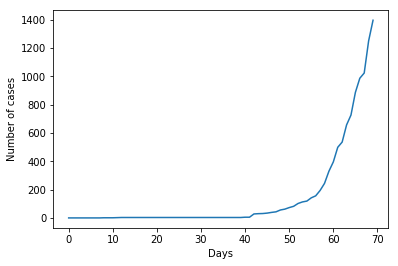

In [64]:
days = []
cases = []
i = 0
for loc, num_cases in zip(df['Location'],df['Num_Cases']):
    if loc == "India":
        days.append(i)
        cases.append(num_cases)
        i += 1
plt.ylabel("Number of cases")
plt.xlabel("Days")
plt.plot(days, cases)

In [18]:
columns_input = ['Location','Population_Density','Date','Min_Temp','Max_Temp','Lockdown']
input_data = df[columns_input]
output_data = df['Num_Cases']
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.304761, random_state = 1)
np.reshape(np.ravel(X_train),(292,1,6))
np.reshape(np.ravel(X_test),(128,1,6))

array([[['Australia', 0.0, '2/19/2020', 0.4375, 0.5833333333333334, 0]],

       [['Italy', 0.4383906119027661, '2/16/2020', 0.375,
         0.5208333333333334, 1]],

       [['USA', 0.07124895222129086, '2/8/2020', 0.16666666666666666,
         0.3125, 0]],

       [['Italy', 0.4383906119027661, '3/1/2020', 0.3958333333333333,
         0.4791666666666667, 1]],

       [['USA', 0.07124895222129086, '1/26/2020', 0.20833333333333334,
         0.3958333333333333, 0]],

       [['India', 1.0, '3/1/2020', 0.5416666666666666,
         0.7708333333333334, 0]],

       [['India', 1.0, '1/25/2020', 0.5, 0.625, 0]],

       [['Australia', 0.0, '2/2/2020', 0.625, 0.875, 0]],

       [['France', 0.03185247275775357, '3/16/2020', 0.3541666666666667,
         0.3958333333333333, 0]],

       [['USA', 0.07124895222129086, '1/27/2020', 0.2708333333333333,
         0.3958333333333333, 0]],

       [['China', 0.30678960603520533, '3/9/2020', 0.3958333333333333,
         0.4583333333333333, 0]],

       